### About Dataset
## Context
With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

## Content
This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

## Inspiration
Some possible insights could be -

- What variables are contributing to customer churn?
- Who are the customers more likely to churn?
- What actions can be taken to stop them from leaving?

### Dataset Details
Each row represents a customer and each column contains attributes related to customer as described in the column description.
The “Churn” column is our target variable.

#### Columns Explanation
- **Churn:** 1 if customer cancelled service, 0 if not
- **AccountWeeks:** number of weeks customer has had active account
- **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
- **DataPlan:** 1 if customer has data plan, 0 if not
- **DataUsage:** amount of data used by customer in MB
- **CustServCalls:** number of calls to customer service
- **DayMins:** average minutes customer has used on the day
- **DayCalls:** average number of calls customer has made on the day
- **MonthlyCharge:** average monthly charge for customer
- **OverageFee:** fee for customer going over their data plan
- **RoamMins:** average minutes customer has used roaming

In [1]:
# Read csv file
import pandas as pd

df = pd.read_csv('/Users/gamzekecibas/Desktop/GIT/data-science-practice/telecom-churn-practice/data/raw/telecom_churn.csv')

# Show the first 5 rows of the dataframe
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
## Applied general exploratory data analysis steps

### 1. Data Cleaning
## Check missing values for each column & print the columns with missing values as statement
print(f"Missing values for each column:\n{df.isnull().sum()}")
print("-----------------------------------")
print(f"Duplicate values: {df.duplicated().sum()}")
print("-----------------------------------")
print(f"Unique values:\n{df.nunique()}")

## if there are duplicate values, drop the duplicate values & print before after shapes
if df.duplicated().sum() > 0:
    print("-----------------------------------")
    print(f"Before duplicate values: {df.shape}")
    df = df.drop_duplicates()
    print("-----------------------------------")
    print(f"After duplicate values: {df.shape}")


Missing values for each column:
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
-----------------------------------
Duplicate values: 0
-----------------------------------
Unique values:
Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64


In [3]:
## To handle missing values when there is no change data characteristics, you can use one way drop all missing values or fill the missing values without change data characteristics
## alternative 1: drop all missing values
df1 = df.dropna()
## alternative 2: fill the missing values with the mean of the column
df2 = df.fillna(df.mean())
## alternative 3: fill the missing values with the median of the column
df3 = df.fillna(df.median())
## alternative 4: fill the missing values with the mode of the column
df4 = df.fillna(df.mode())

## Compare df1, df2, df3, and df4 to select best missing values treatment in perspective of data characteristics
# is it possible to compare them in visual way?

print("-----------------------------------")
print(f"df1 describes:\n{df1.describe()}")
print("-----------------------------------")
print(f"df2 describes:\n{df2.describe()}")
print("-----------------------------------")
print(f"df3 describes:\n{df3.describe()}")
print("-----------------------------------")
print(f"df4 describes:\n{df4.describe()}")


-----------------------------------
df1 describes:
             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std

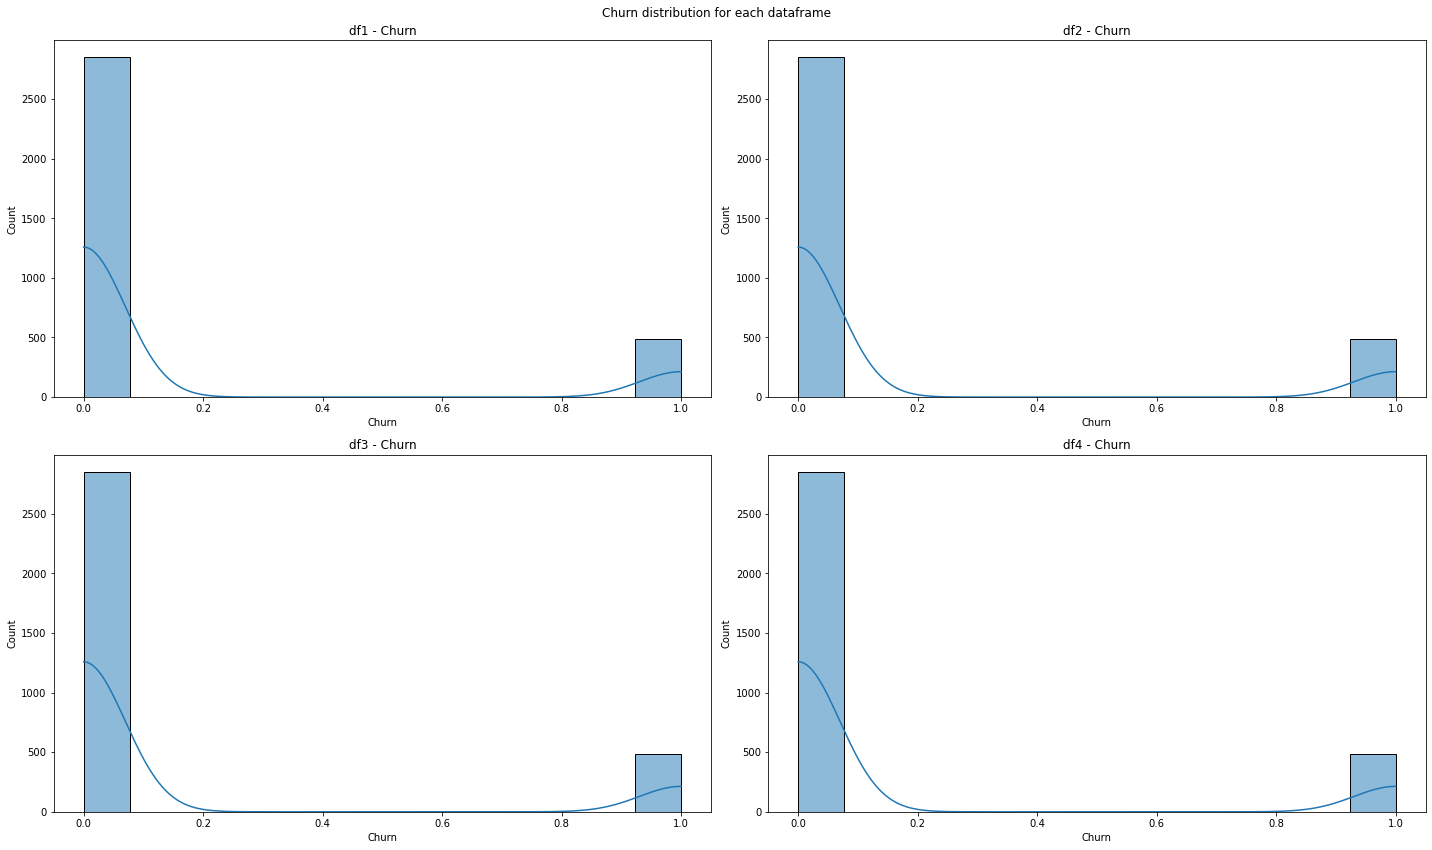

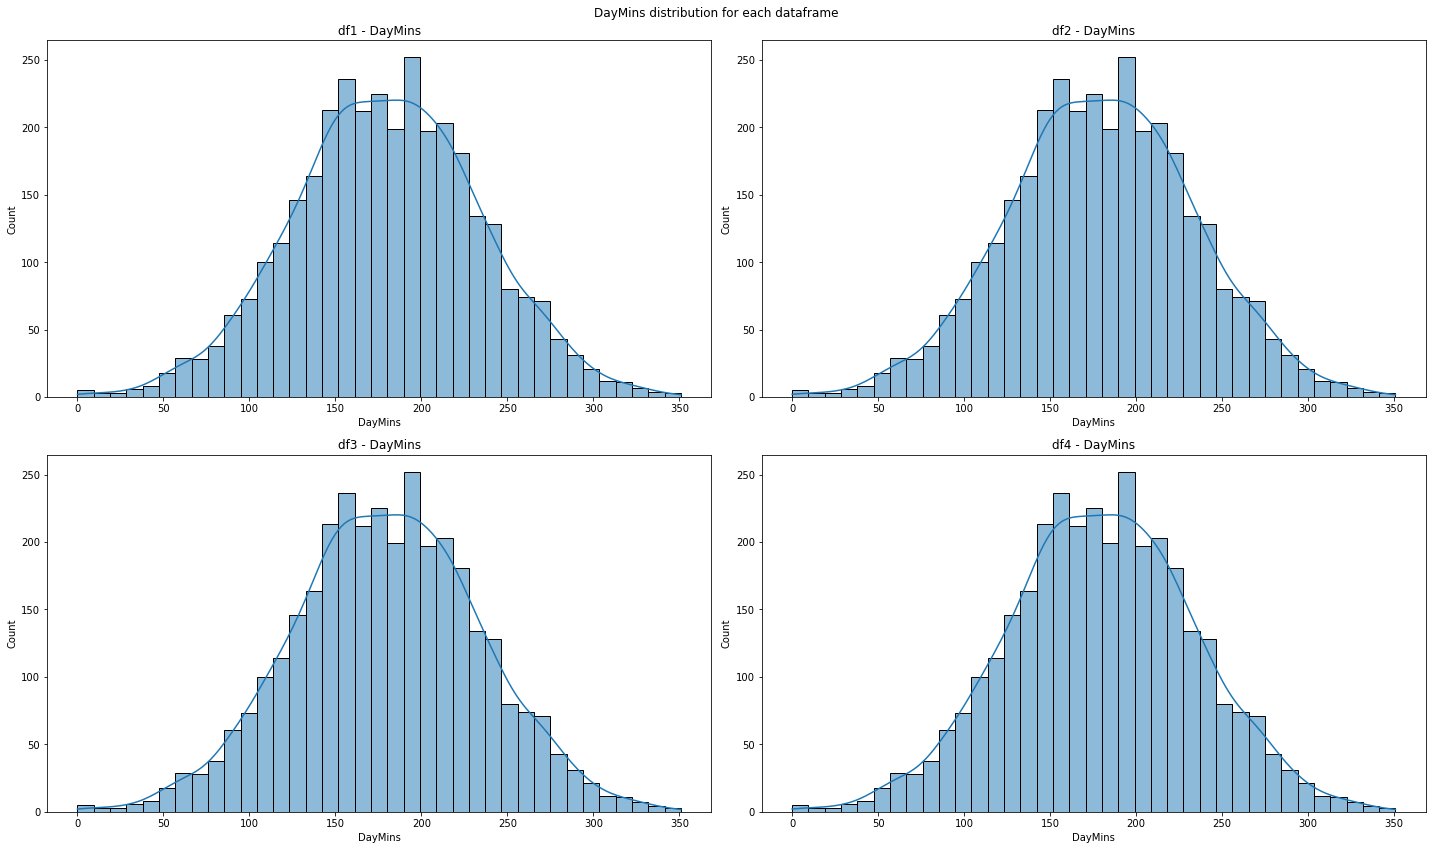

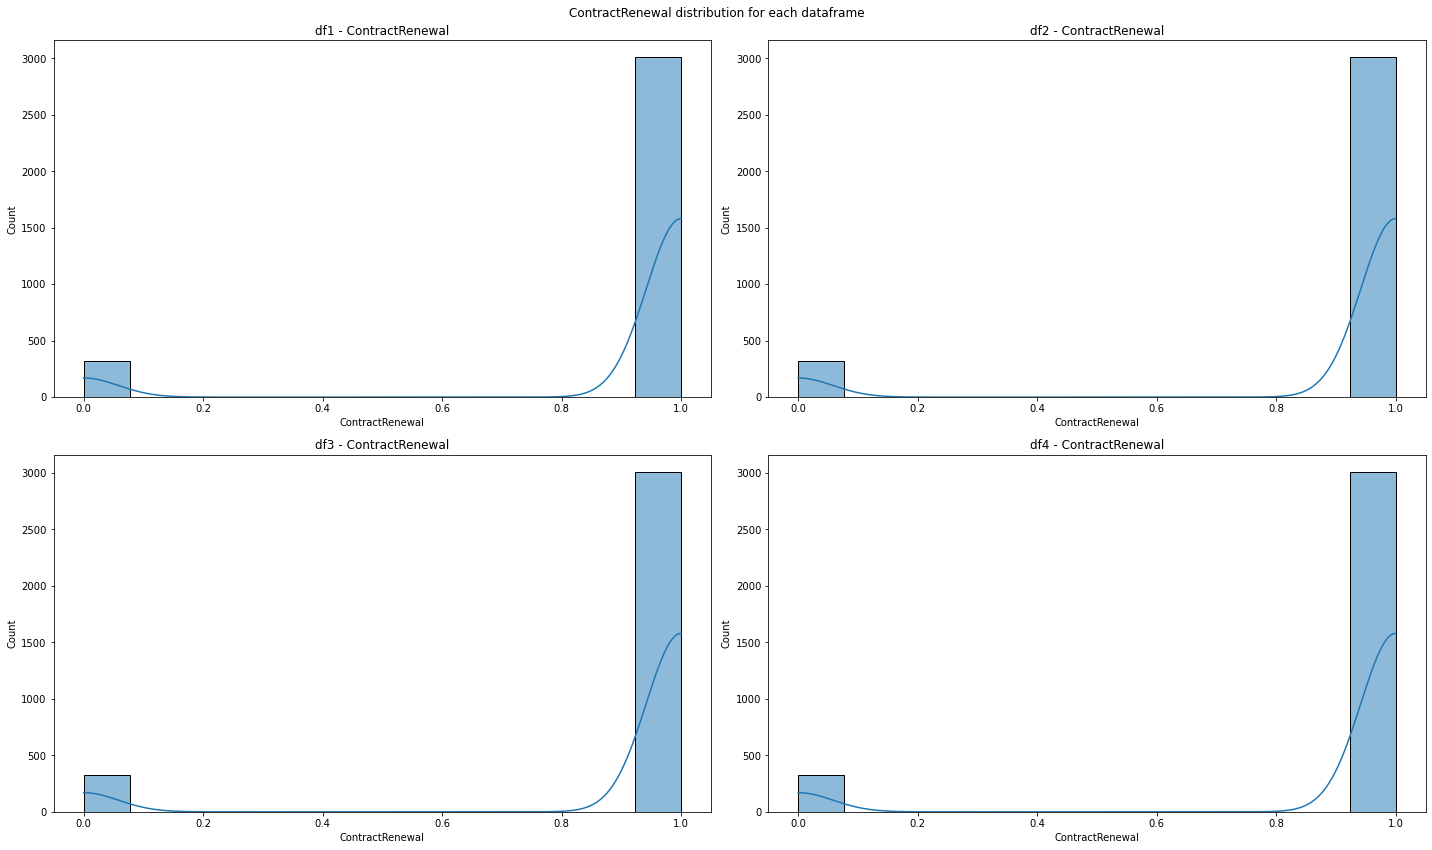

In [4]:
#visualize the descriptons
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(dataframes, feature_name):
    """ Plot the feature distribution for each dataframe

    Args:
        dataframes (list): list of dataframes
        feature_name (string): a common feature name for all dataframes to compare
    """
    # Calculate the number of rows and columns needed for subplots
    n = len(dataframes)
    nrows = (n + 1) // 2  # Round up to nearest integer
    ncols = 2 if n > 1 else 1

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 6*nrows))
    
    # Flatten axes array for easier indexing
    axes = axes.flatten() if n > 1 else [axes]

    # Plotting for each dataframe
    for i, df in enumerate(dataframes):
        sns.histplot(df[feature_name], kde=True, ax=axes[i])
        axes[i].set_title(f'df{i+1} - {feature_name}')

    # Remove any unused subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle(f'{feature_name} distribution for each dataframe')
    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
plot_feature_distribution([df1, df2, df3, df4], 'Churn')
plot_feature_distribution([df1, df2, df3, df4], 'DayMins')
plot_feature_distribution([df1, df2, df3, df4], 'ContractRenewal')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


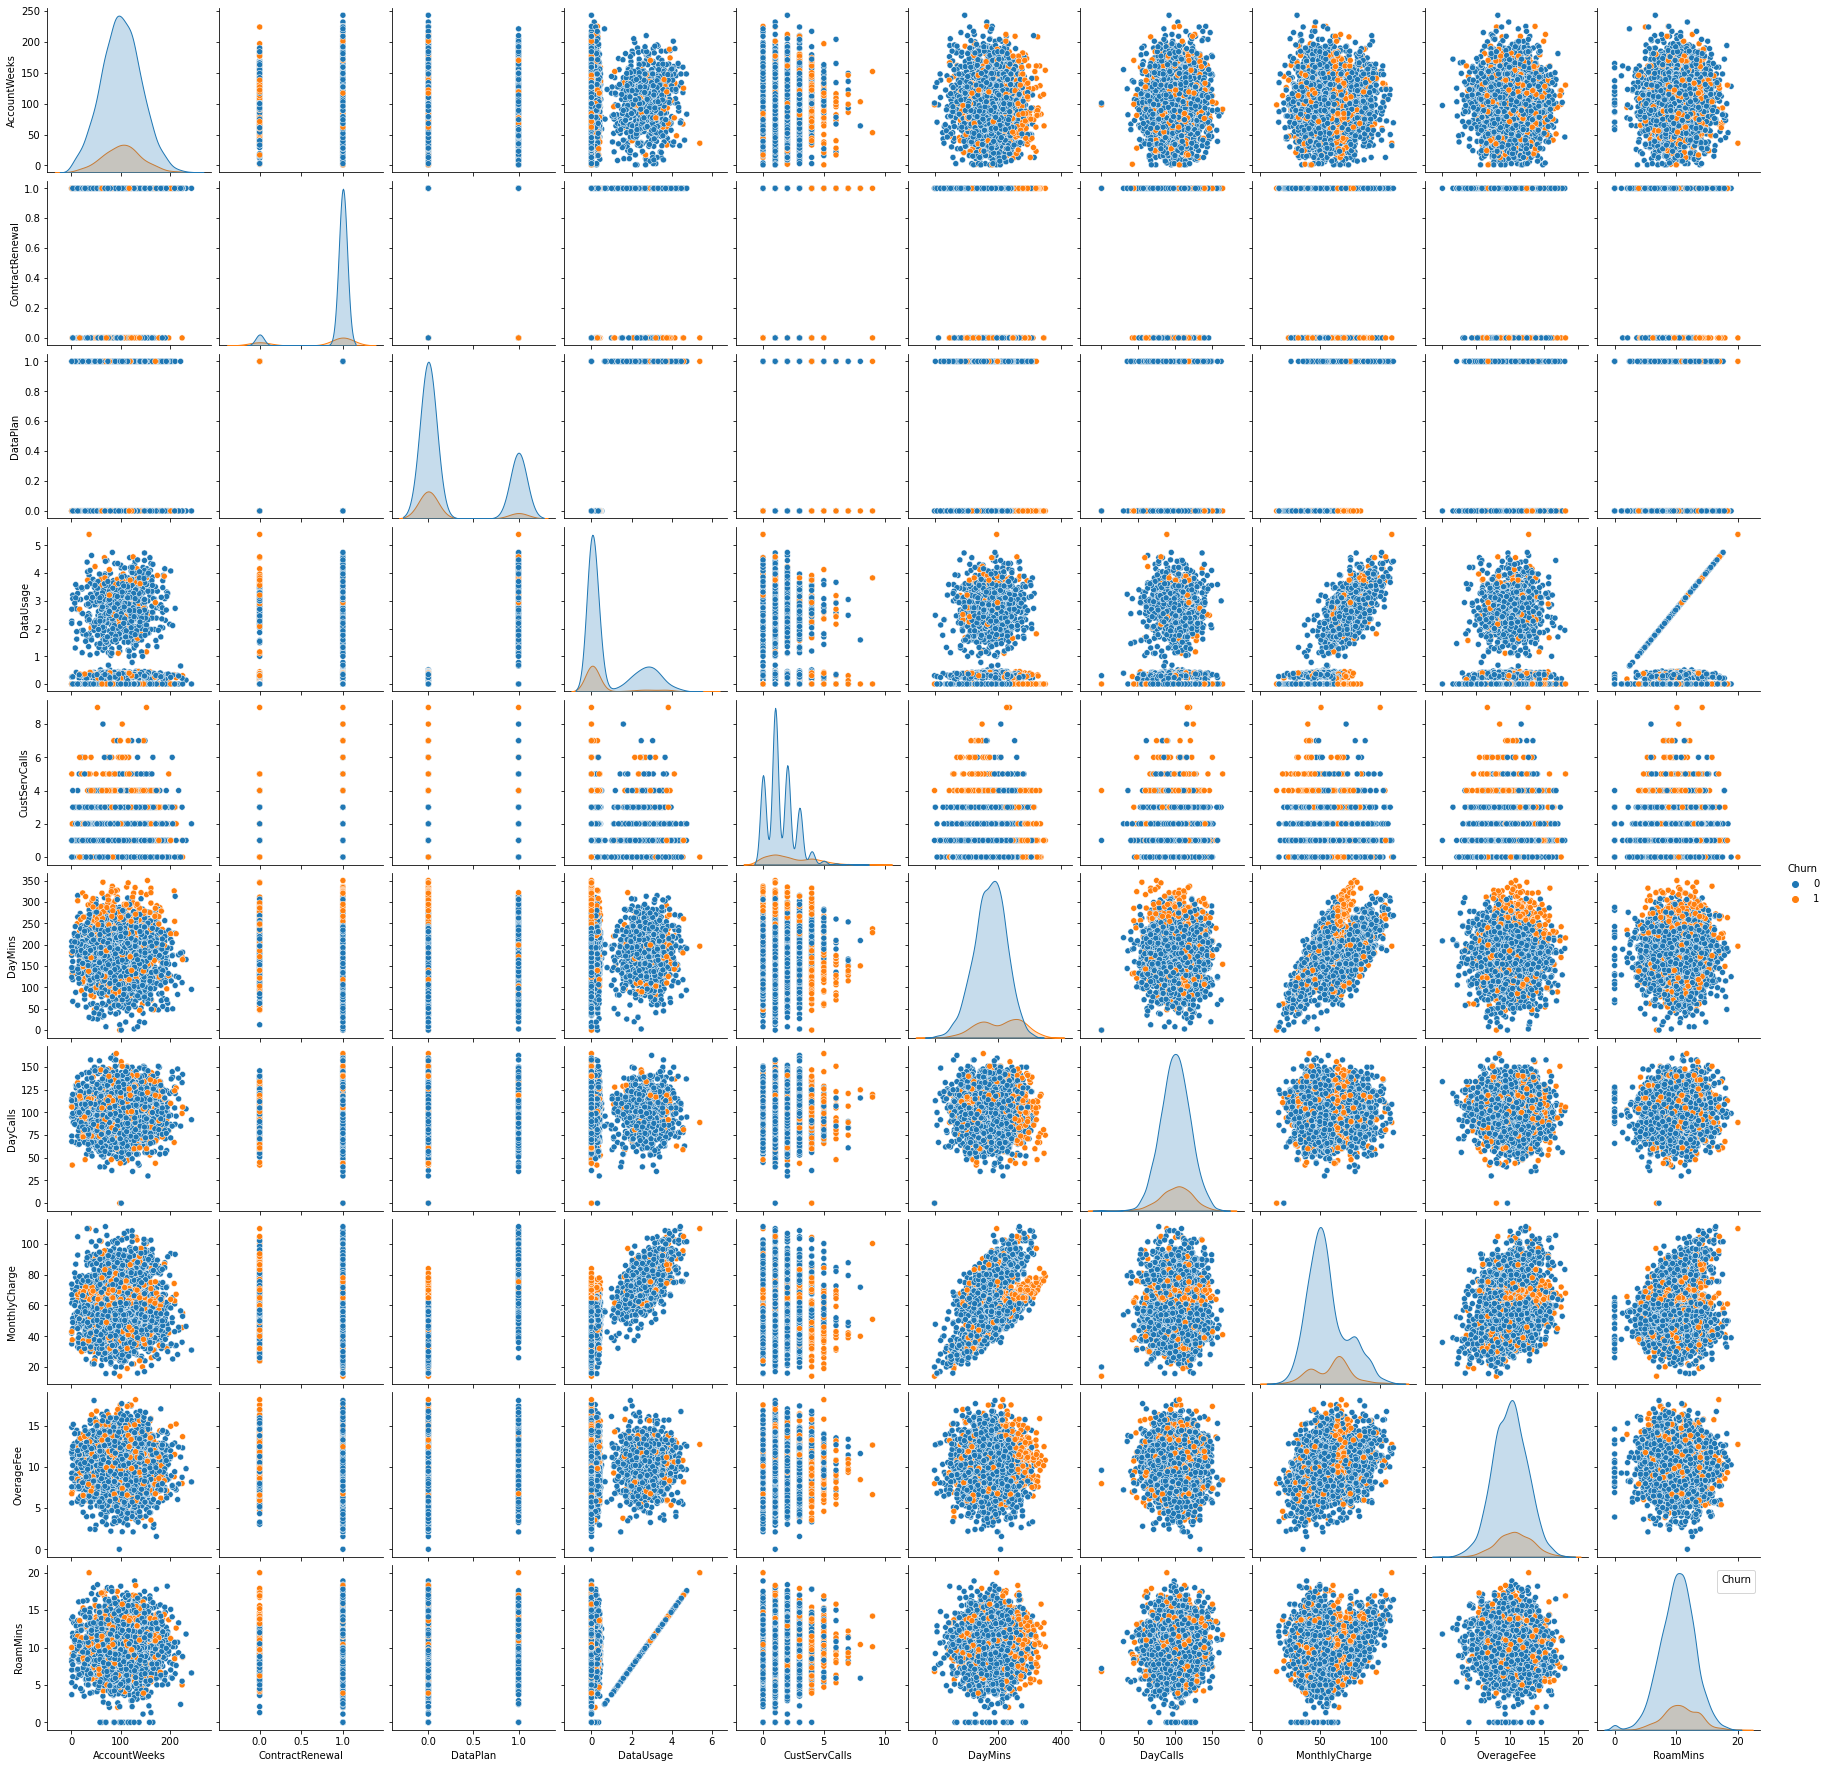

In [5]:
### 2. Data Visualization   
## Create a pairplot for the dataframe to visualize the relationships between the features
sns.pairplot(df, hue='Churn')
plt.legend(title='Churn', loc='upper right')
plt.show()

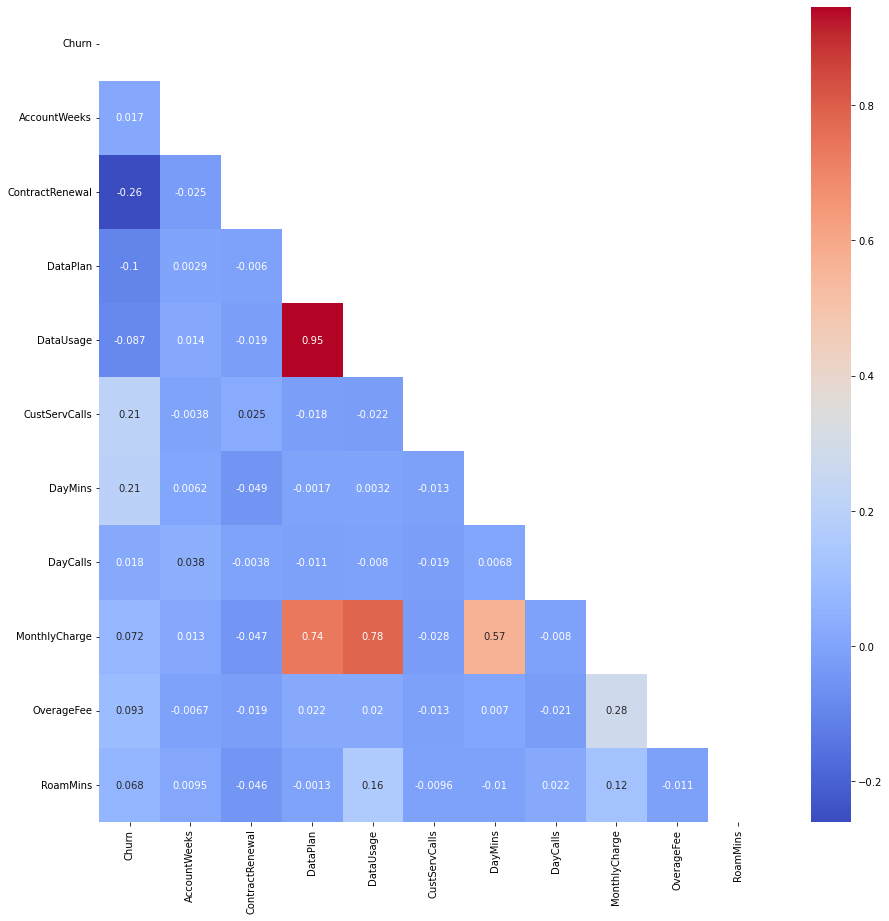

In [6]:
### how to create a heatmap as upper triangular matrix for the dataframe to visualize the relationships between the features
import numpy as np

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(df.corr(), dtype=bool)))
plt.show()

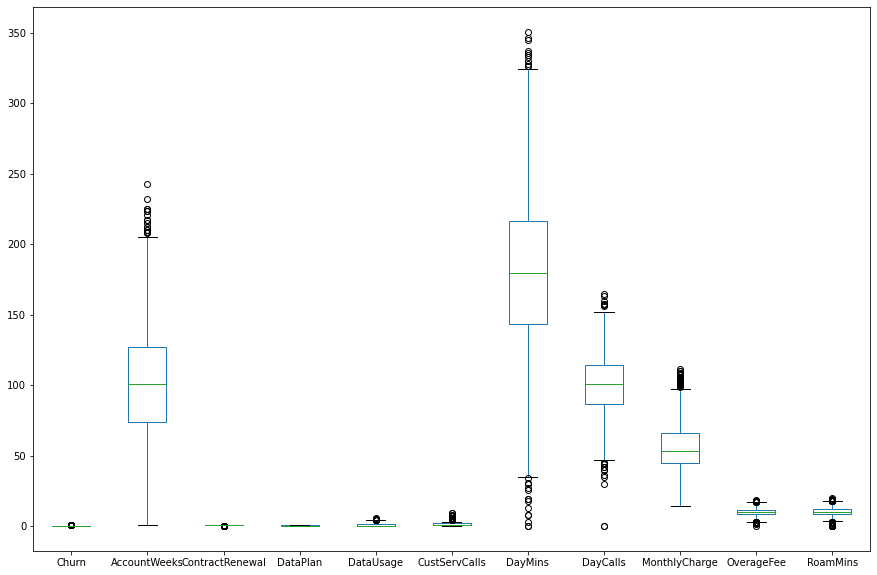

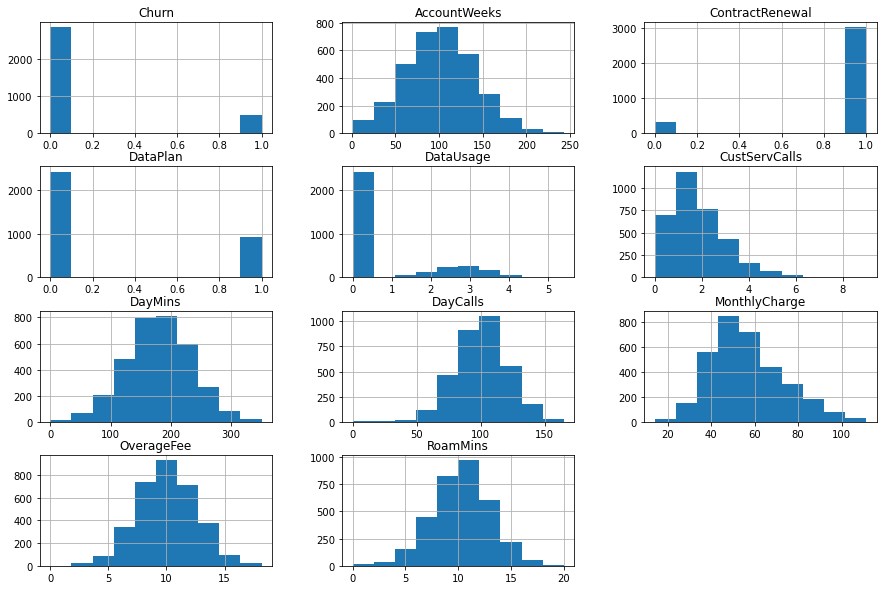

In [7]:
### 3. Data Analysis
## check outliers/ anomalies and data distribution for each feature
## Also visualize outliers and data distribution for each feature

# Outliers
df.boxplot(figsize=(15, 10))
plt.grid(False)
plt.show()  

# Data distribution
df.hist(figsize=(15, 10))
plt.grid(False)
plt.show()


In [8]:
### 4. Data Preprocessing
# Handle outliers with z-score & remove them
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
df_no_outliers_zscores = df[(z_scores < 3).all(axis=1)]

# Handle outliers with IQR & remove them
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the dataframe before and after removing outliers
print(f"Before removing outliers: {df.shape}")
print(f"By z-score, After removing outliers: {df_no_outliers_zscores.shape}")
print(f"By IQR, After removing outliers: {df_no_outliers_iqr.shape}")



Before removing outliers: (3333, 11)
By z-score, After removing outliers: (2919, 11)
By IQR, After removing outliers: (2427, 11)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_comparison(dataframes, df_names, features, n_cols=2):
    """
    Plot distribution comparisons for multiple dataframes and features.
    
    Args:
    dataframes (list): List of pandas DataFrames to compare
    df_names (list): List of names for each DataFrame
    features (list): List of feature names to plot
    n_cols (int): Number of columns in the subplot grid (default 2)
    """
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15*n_cols, 10*n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(dataframes)))
    
    for i, feature in enumerate(features):
        ax = axes[i]
        for df, name, color in zip(dataframes, df_names, colors):
            sns.histplot(data=df, x=feature, kde=True, color=color, alpha=0.3, 
                         label=name, edgecolor='none', ax=ax)
        
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.legend()
        
        # Ensure spines are visible
        for spine in ax.spines.values():
            spine.set_visible(True)
        
        # Add vertical lines for mean and median of original data
        ax.axvline(dataframes[0][feature].mean(), color=colors[0], linestyle='dashed', 
                   linewidth=1, label=f'{df_names[0]} Mean')
        ax.axvline(dataframes[0][feature].median(), color=colors[0], linestyle='dotted', 
                   linewidth=1, label=f'{df_names[0]} Median')
        
        # Add a grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

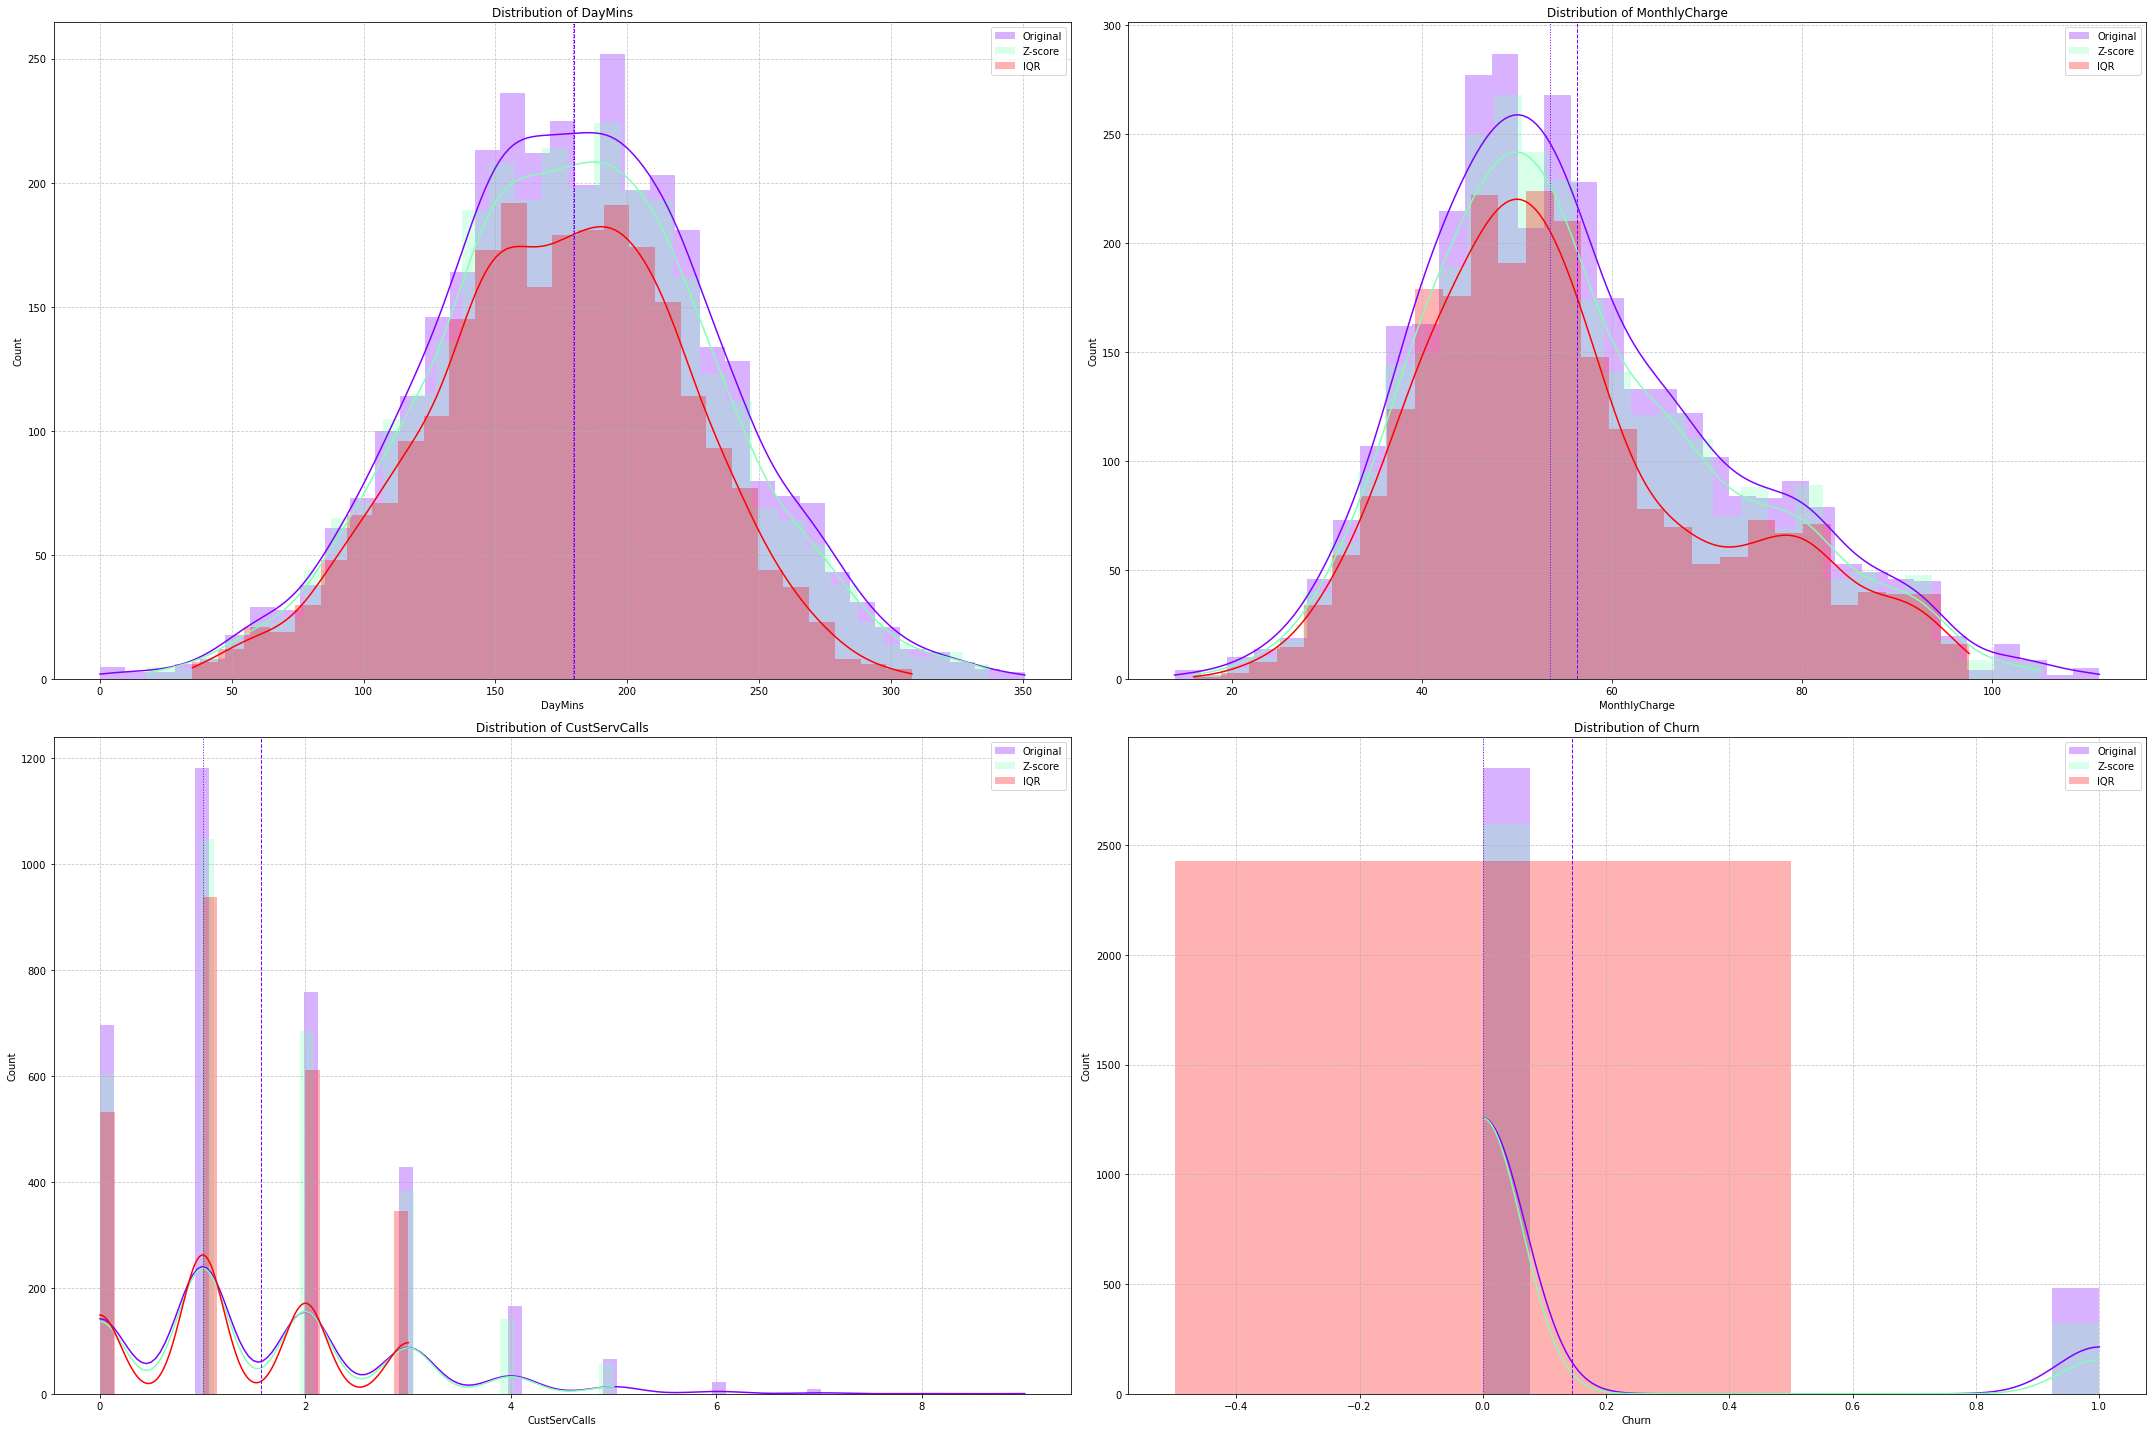

In [10]:
dfs = [df, df_no_outliers_zscores, df_no_outliers_iqr]
df_names = ['Original', 'Z-score', 'IQR']
features_to_plot = ['DayMins', 'MonthlyCharge', 'CustServCalls', 'Churn']  # Add more features as needed

plot_distribution_comparison(dfs, df_names, features_to_plot)

In [11]:
from scipy import stats
import pandas as pd
import numpy as np

def normality_test_all_columns(df, df_name):
    results = []
    for column in df.select_dtypes(include=[np.number]).columns:
        try:
            statistic, p_value = stats.normaltest(df[column])
            results.append({
                'Column': column,
                'Statistic': round(statistic, 4),
                'p-value': f'{p_value:.4e}',
                'Normal at α=0.05': 'Yes' if p_value > 0.05 else 'No'
            })
        except ValueError:
            # Skip columns with insufficient data for the test
            continue
    return pd.DataFrame(results).set_index('Column')

# Perform tests on all dataframes
results = {
    'Original': normality_test_all_columns(df, "Original"),
    'Z-score filtered': normality_test_all_columns(df_no_outliers_zscores, "Z-score filtered"),
    'IQR filtered': normality_test_all_columns(df_no_outliers_iqr, "IQR filtered")
}

# Combine results into a single DataFrame with multi-level index
results_df = pd.concat(results, axis=0, names=['DataFrame', 'Column'])

# Display the table
print("D'Agostino-Pearson's K^2 test results for all numerical columns:")
# Ensure all rows are displayed -- pd.set_option('display.max_rows', None)  
print(results_df.head(5))

# Reset display options
pd.reset_option('display.max_rows')

# Add summary
print("----------------------------------------")
print("\nSummary of normality test results:")
for df_name, df_results in results.items():
    total_features = len(df_results)
    normal_features = df_results['Normal at α=0.05'].value_counts().get('Yes', 0)
    print(f"{df_name}:")
    print(f"  Total features: {total_features}")
    print(f"  Features passing normality test: {normal_features}")
    print(f"  Percentage passing: {normal_features/total_features*100:.2f}%")
    print()

D'Agostino-Pearson's K^2 test results for all numerical columns:
                           Statistic      p-value Normal at α=0.05
DataFrame Column                                                  
Original  Churn            1162.5959  3.5116e-253               No
          AccountWeeks        6.8844   3.1994e-02               No
          ContractRenewal  1772.7201   0.0000e+00               No
          DataPlan         1155.3670  1.3039e-251               No
          DataUsage         560.6955  1.7641e-122               No
----------------------------------------

Summary of normality test results:
Original:
  Total features: 11
  Features passing normality test: 2
  Percentage passing: 18.18%

Z-score filtered:
  Total features: 11
  Features passing normality test: 4
  Percentage passing: 36.36%

IQR filtered:
  Total features: 11
  Features passing normality test: 1
  Percentage passing: 9.09%



In [12]:
# 2. Feature engineering
df_engineered = df_no_outliers_zscores.copy()
df_engineered['DataUsagePerWeek'] = df_engineered['DataUsage'] / df_engineered['AccountWeeks']
df_engineered['AvgChargePerMin'] = df_engineered['MonthlyCharge'] / df_engineered['DayMins']


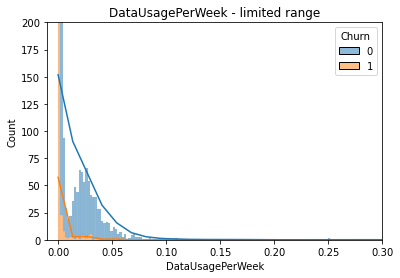

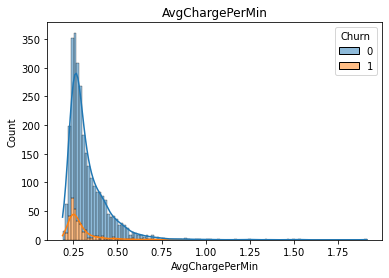

In [13]:
sns.histplot(data=df_engineered, x='DataUsagePerWeek', hue='Churn', multiple='stack', kde=True)
plt.title('DataUsagePerWeek - limited range')
plt.ylim(0, 200)
plt.xlim(-0.01, 0.3)
plt.show()
sns.histplot(data=df_engineered, x='AvgChargePerMin', hue='Churn', multiple='stack', kde=True)
plt.title('AvgChargePerMin')
plt.show()


In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_z_scaled = pd.DataFrame(scaler.fit_transform(df_engineered), columns=df_engineered.columns)

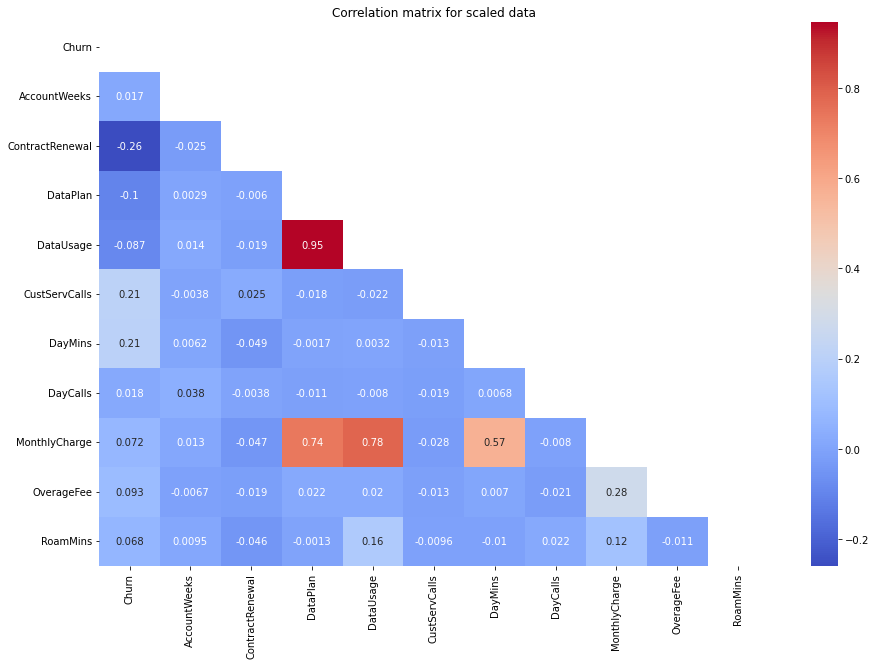

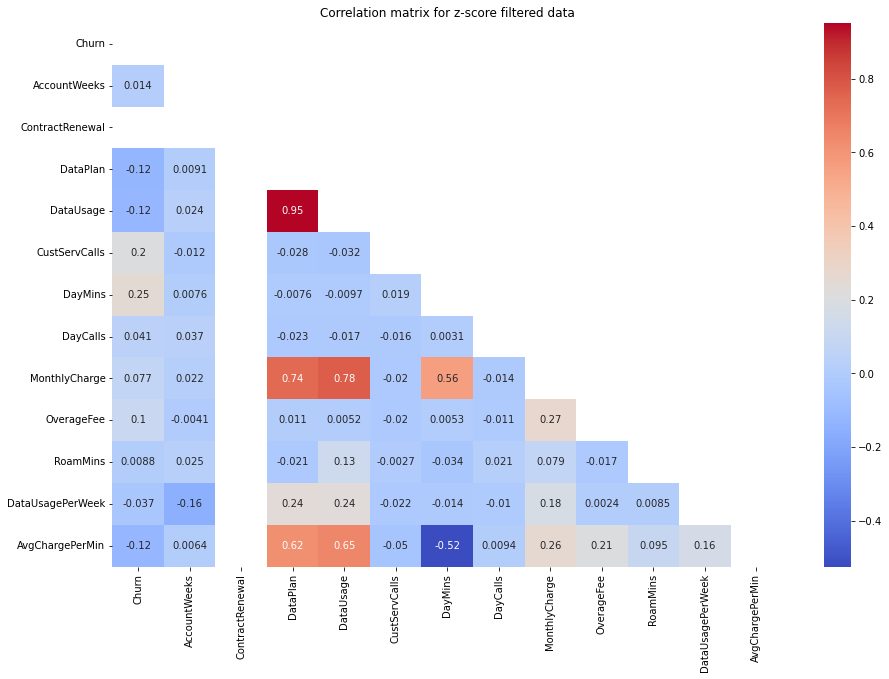

In [15]:
## check correlations on scaled dataframes for churn
plt.figure(figsize=(15, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(df_scaled.corr(), dtype=bool)))
plt.title('Correlation matrix for scaled data')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df_z_scaled.corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(df_z_scaled.corr(), dtype=bool)))
plt.title('Correlation matrix for z-score filtered data')
plt.show()

In [16]:
## Create a supervised binary classification model for churn prediction using three different ML models and compare the results from the basic to complex models
from sklearn.model_selection import train_test_split
# Output set (unchanged)
df_z_scaled_churn = df_z_scaled[['Churn']]

df_z_scaled_input = df_z_scaled.drop(columns=[
    'Churn',  
    'AccountWeeks',  
    'DataPlan',
    'ContractRenewal'  
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_z_scaled_input, df_z_scaled_churn, test_size=0.2, random_state=42)

# 1. Check class imbalance
print("Class distribution:")
print(df_z_scaled_churn['Churn'].value_counts(normalize=True))
print("In training set:")
print(y_train.value_counts(normalize=True))
print("In testing set:")
print(y_test.value_counts(normalize=True))


Class distribution:
0.0    0.890031
1.0    0.109969
Name: Churn, dtype: float64
In training set:
Churn
0.0      0.886938
1.0      0.113062
dtype: float64
In testing set:
Churn
0.0      0.902397
1.0      0.097603
dtype: float64


In [17]:
## Create a supervised binary classification model for churn prediction using three different ML models and compare the results from the basic to complex models
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_recall = recall_score(y_test, lr_predictions) # recall is the number of true positives over the number of true positives plus false negatives  
print(f"Logistic Regression Recall: %{lr_recall*100:.2f}")
print(classification_report(y_test, lr_predictions))

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_recall = recall_score(y_test, svm_predictions)
print(f"SVM Recall: %{svm_recall*100:.2f}")
print(classification_report(y_test, svm_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_recall = recall_score(y_test, rf_predictions)
print(f"Random Forest Recall: %{rf_recall*100:.2f}")
print(classification_report(y_test, rf_predictions))


/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/9v/f5fwvtnn68x0q693jqp5lgxm0000gn/T/ipykernel_6934/2456787782.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Logistic Regression Recall: %14.04
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       527
         1.0       0.57      0.14      0.23        57

    accuracy                           0.91       584
   macro avg       0.74      0.56      0.59       584
weighted avg       0.88      0.91      0.88       584

SVM Recall: %10.53
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       527
         1.0       1.00      0.11      0.19        57

    accuracy                           0.91       584
   macro avg       0.96      0.55      0.57       584
weighted avg       0.92      0.91      0.88       584

Random Forest Recall: %63.16
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       527
         1.0       0.82      0.63      0.71        57

    accuracy                           0.95       584
   macro avg       0.89      0.81      0.84  

In [18]:
# Define a function to plot feature importance
def plot_feature_importance(input_columns, model):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn.inspection import permutation_importance

    # Check if the model has feature_importances_ attribute
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For models like Logistic Regression, use absolute values of coefficients
        importances = np.abs(model.coef_[0])
    else:
        # For models without built-in feature importance, use permutation importance
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean

    # Create a DataFrame to store feature importances
    feature_importances = pd.DataFrame({
        'Feature': input_columns,
        'Importance': importances
    })

    # Sort the DataFrame by importance in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {type(model).__name__}')
    plt.show()


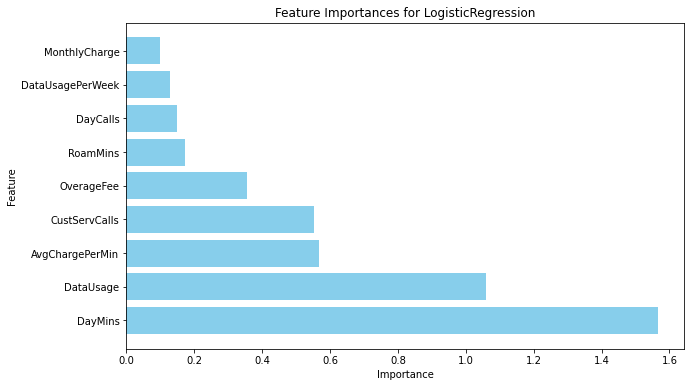

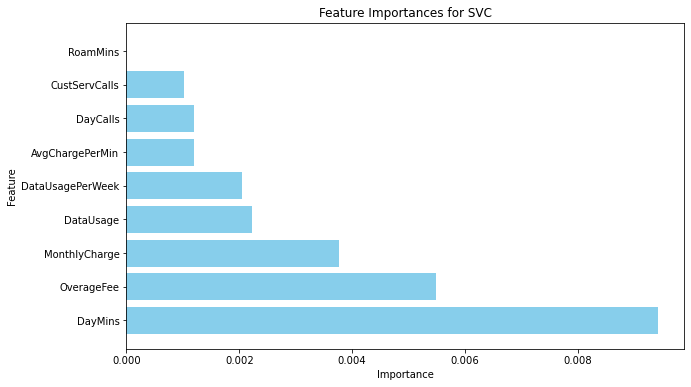

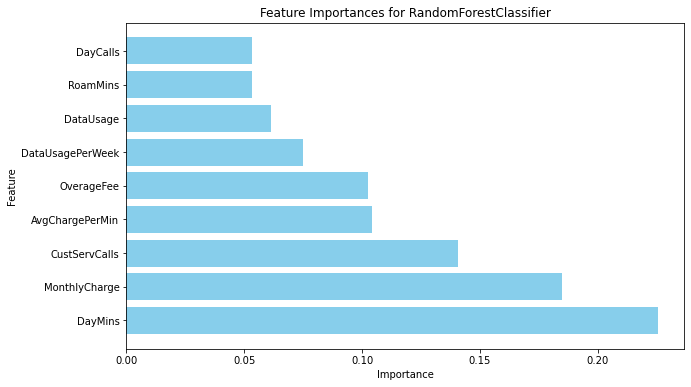

In [19]:
plot_feature_importance(X_train.columns, lr_model)
plot_feature_importance(X_train.columns, svm_model)
plot_feature_importance(X_train.columns, rf_model)


In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score


# 5. Create and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# 6. Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {cv_scores.mean():.4f}")

# 7. Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# 8. Train the model with best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# 9. Evaluate the model
y_pred = best_xgb_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nRecall score: {100*recall_score(y_test, y_pred):.2f}")


Cross-validation recall scores: [0.73076923 0.62264151 0.75471698 0.60377358 0.75471698]
Mean recall score: 0.6933
Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}
Best recall score: 0.6933962264150944

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       527
         1.0       0.77      0.63      0.69        57

    accuracy                           0.95       584
   macro avg       0.86      0.81      0.83       584
weighted avg       0.94      0.95      0.94       584


Recall score: 63.16


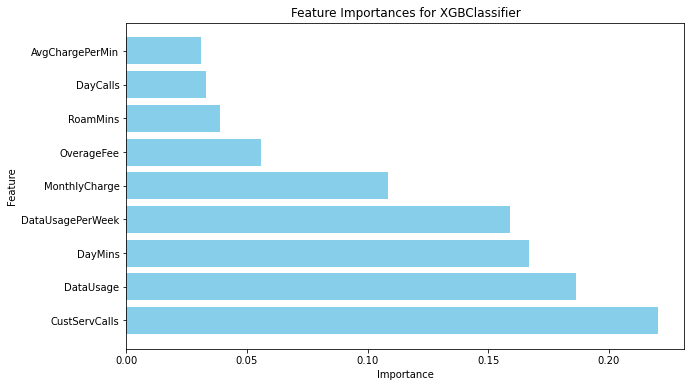

In [21]:
plot_feature_importance(X_train.columns, best_xgb_model)